# Random Forest Demo

This notebook demonstrates the implementation and usage of our Random Forest algorithm. We'll compare it with scikit-learn's implementation and visualize the results on different datasets.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier as SklearnRandomForest

# Import our implementation
from random_forest import RandomForestClassifier

## 1. Load and Prepare Data

We'll use the Iris dataset for our demonstration.

In [2]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Training set shape: (120, 4)
Testing set shape: (30, 4)


## 2. Train Our Random Forest

In [3]:
# Initialize and train our random forest
our_rf = RandomForestClassifier(
    n_trees=100,
    min_samples_split=2,
    max_depth=10,
    n_features=2  # Consider sqrt(n_features) at each split
)
our_rf.fit(X_train_scaled, y_train)

# Make predictions
our_predictions = our_rf.predict(X_test_scaled)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"Our Random Forest Accuracy: {our_accuracy:.4f}")

Our Random Forest Accuracy: 1.0000


## 3. Compare with scikit-learn Implementation

In [4]:
# Train scikit-learn's random forest
sklearn_rf = SklearnRandomForest(
    n_estimators=100,
    min_samples_split=2,
    max_depth=10,
    max_features=2,
    random_state=42
)
sklearn_rf.fit(X_train_scaled, y_train)

# Make predictions
sklearn_predictions = sklearn_rf.predict(X_test_scaled)
sklearn_accuracy = accuracy_score(y_test, sklearn_predictions)

print(f"scikit-learn Random Forest Accuracy: {sklearn_accuracy:.4f}")

scikit-learn Random Forest Accuracy: 1.0000


## 4. Visualize Confusion Matrix

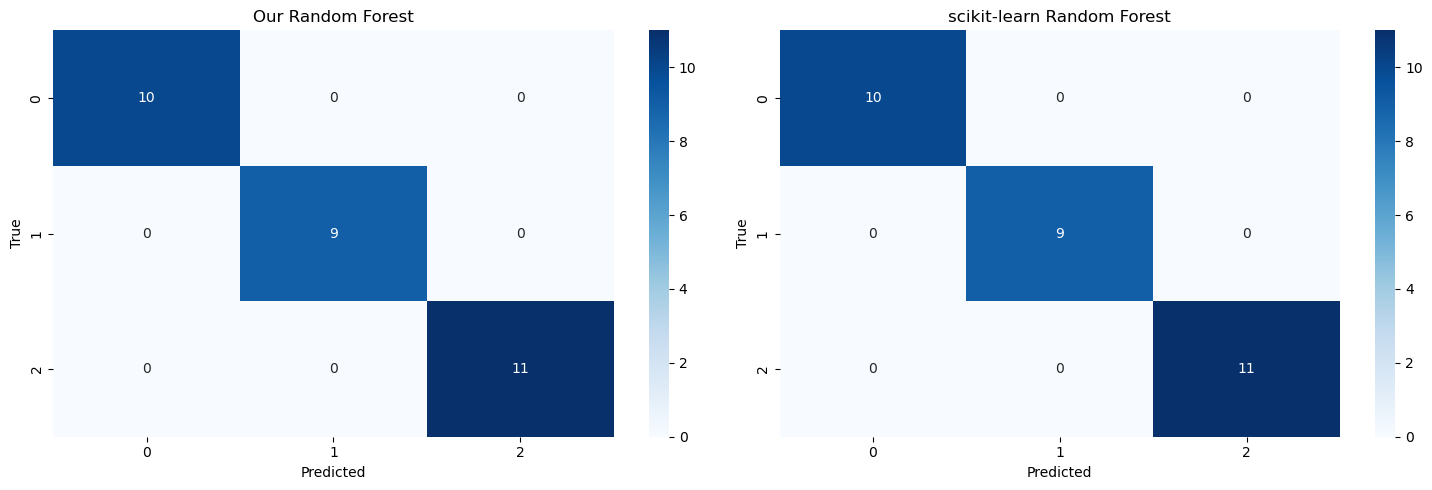

In [5]:
# Plot confusion matrices
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Our implementation
cm_our = confusion_matrix(y_test, our_predictions)
sns.heatmap(cm_our, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('Our Random Forest')
ax1.set_xlabel('Predicted')
ax1.set_ylabel('True')

# scikit-learn implementation
cm_sklearn = confusion_matrix(y_test, sklearn_predictions)
sns.heatmap(cm_sklearn, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('scikit-learn Random Forest')
ax2.set_xlabel('Predicted')
ax2.set_ylabel('True')

plt.tight_layout()
plt.show()

## 5. Test on Non-linear Data

Let's see how our Random Forest performs on a more complex non-linear dataset.

In [6]:
# Generate moons dataset
X_moons, y_moons = make_moons(n_samples=500, noise=0.3, random_state=42)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X_moons, y_moons, test_size=0.2, random_state=42
)

# Train our random forest
our_rf = RandomForestClassifier(
    n_trees=100,
    min_samples_split=2,
    max_depth=10
)
our_rf.fit(X_train, y_train)

# Make predictions
our_predictions = our_rf.predict(X_test)
our_accuracy = accuracy_score(y_test, our_predictions)

print(f"Our Random Forest Accuracy on Moons Dataset: {our_accuracy:.4f}")

Our Random Forest Accuracy on Moons Dataset: 0.8800


## 6. Visualize Decision Boundaries

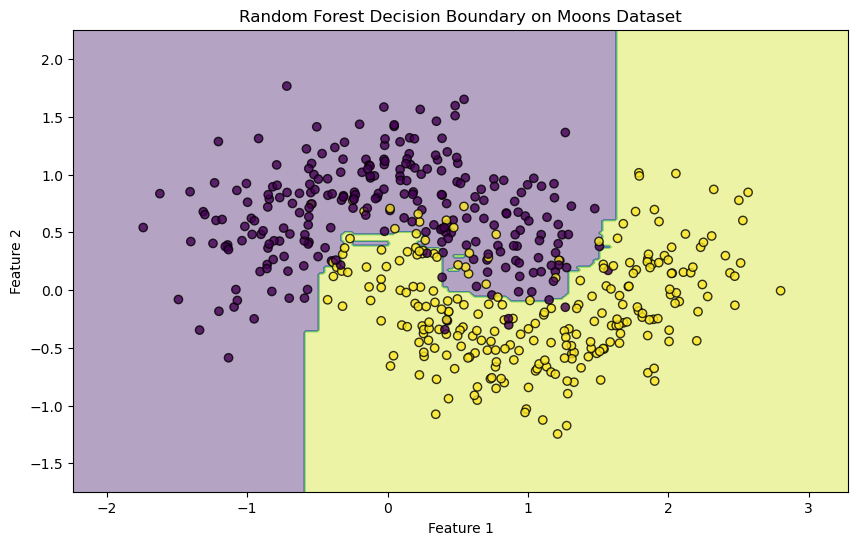

In [7]:
def plot_decision_boundary(model, X, y, title):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Make predictions on mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundary for our random forest
plot_decision_boundary(our_rf, X_moons, y_moons, 'Random Forest Decision Boundary on Moons Dataset')

## 7. Effect of Number of Trees

Number of trees: 1, Accuracy: 0.8500
Number of trees: 5, Accuracy: 0.8700
Number of trees: 10, Accuracy: 0.8800
Number of trees: 50, Accuracy: 0.8900
Number of trees: 100, Accuracy: 0.8900


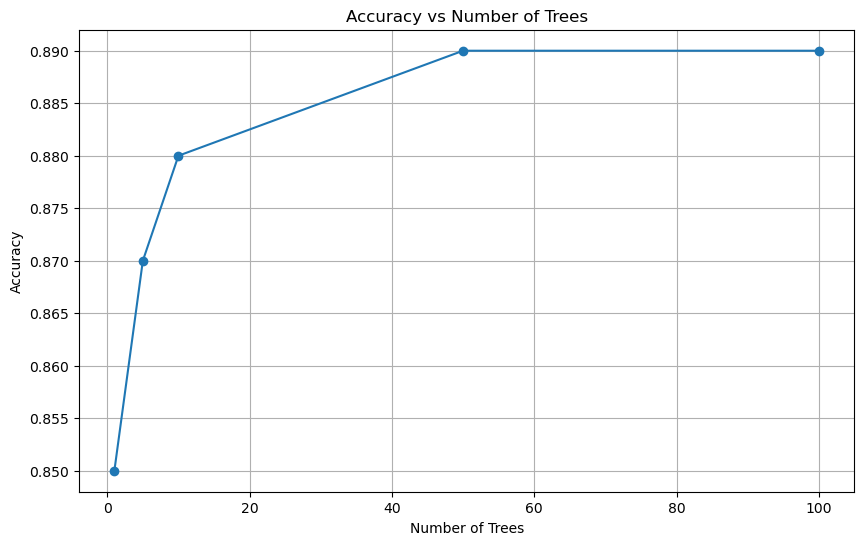

In [8]:
# Test different numbers of trees
n_trees_list = [1, 5, 10, 50, 100]
accuracies = []

for n_trees in n_trees_list:
    rf = RandomForestClassifier(
        n_trees=n_trees,
        min_samples_split=2,
        max_depth=10
    )
    rf.fit(X_train, y_train)
    predictions = rf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    print(f"Number of trees: {n_trees}, Accuracy: {accuracy:.4f}")

# Plot accuracy vs number of trees
plt.figure(figsize=(10, 6))
plt.plot(n_trees_list, accuracies, marker='o')
plt.title('Accuracy vs Number of Trees')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()